In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
df_temperature = pd.read_csv('DailyDelhiClimateTrain.csv', encoding='utf-8')
df_temperature.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [11]:
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [12]:
from statsmodels.tsa.stattools import adfuller

# Extract the 'meantemp' column from the DataFrame
temperature_data = df_temperature['meantemp']

# Perform Augmented Dickey-Fuller test
result = adfuller(temperature_data)

# Extract test statistic and p-value
test_statistic = result[0]
p_value = result[1]

# Check if the data is stationary based on p-value
if p_value < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

ModuleNotFoundError: No module named 'statsmodels'

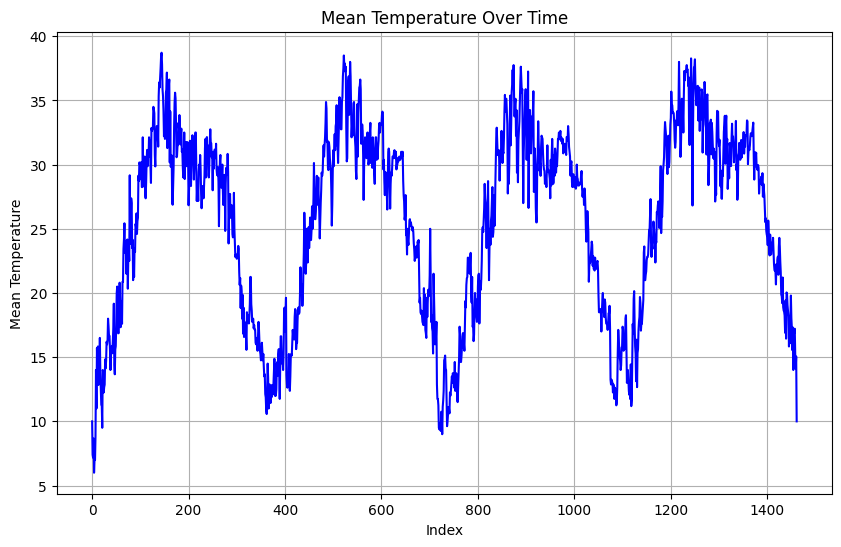

In [ ]:
import matplotlib.pyplot as plt

# Plot the 'meantemp' column
plt.figure(figsize=(10, 6))
plt.plot(df_temperature['meantemp'], color='blue')
plt.title('Mean Temperature Over Time')
plt.xlabel('Index')
plt.ylabel('Mean Temperature')
plt.grid(True)
plt.show()

## Differencing -- non stationary data --> stationary data

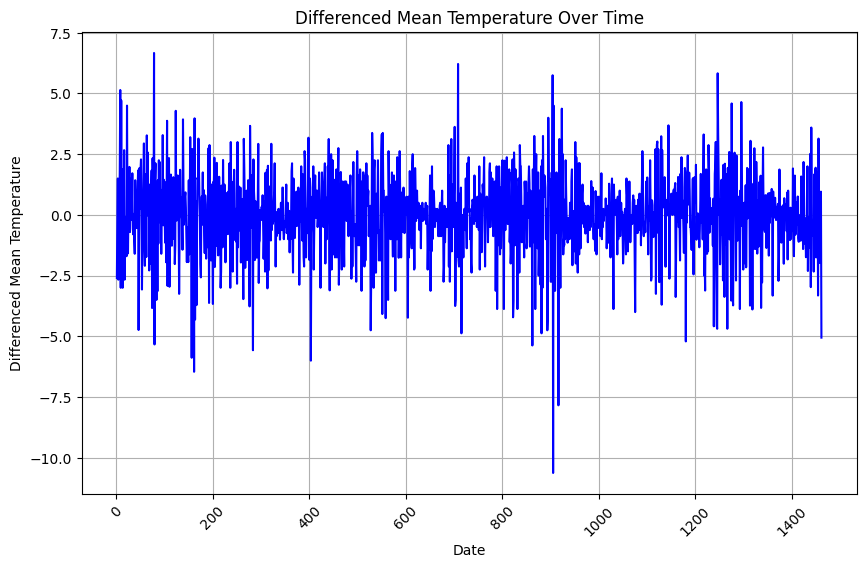

In [ ]:
df_temperature['diff_meantemp'] = df_temperature['meantemp'].diff()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(df_temperature['diff_meantemp'], color='blue')
plt.title('Differenced Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Mean Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
temperature_data = df_temperature['diff_meantemp'].dropna()

# Perform Augmented Dickey-Fuller test
result = adfuller(temperature_data)

# Extract test statistic and p-value
test_statistic = result[0]
p_value = result[1]

# Check if the data is stationary based on p-value
if p_value < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

Data is stationary


In [ ]:
df_temperature.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

df_temperature.index = pd.to_datetime(df_temperature.index)

# Compute the differenced mean temperature
df_temperature['diff_meantemp'] = df_temperature['meantemp'].diff()

# Remove missing values introduced by differencing
df_temperature.dropna(inplace=True)

# Prepare the data
#  Convert datetime index to POSIX timestamps
X = df_temperature.index.astype(int) // 10**9  # Convert nanoseconds to seconds
X = np.array(X).reshape(-1, 1)  # Convert to NumPy array and reshape
print(df_temperature.index)
y = df_temperature['diff_meantemp'].values  # Convert to numpy array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(type(X_train))
print(type(X_test))

DatetimeIndex(['1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               '1970-01-01 00:00:00.000000010',
               '1970-01-01 00:00:00.000000011',
               ...
               '1970-01-01 00:00:00.000001452',
               '1970-01-01 00:00:00.000001453',
               '1970-01-01 00:00:00.000001454',
               '1970-01-01 00:00:00.000001455',
               '1970-01-01 00:00:00.000001456',
               '1970-01-01 00:00:00.000001457',
               '1970-01-01 00:00:00.000001458',
               '1970-01-01 00:00:00.000001459',
               '1970-01-01 00:00:00.000001460',
               '1970-01-01 00:00:00.000001461'],
              dtype=

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.5524914447627394


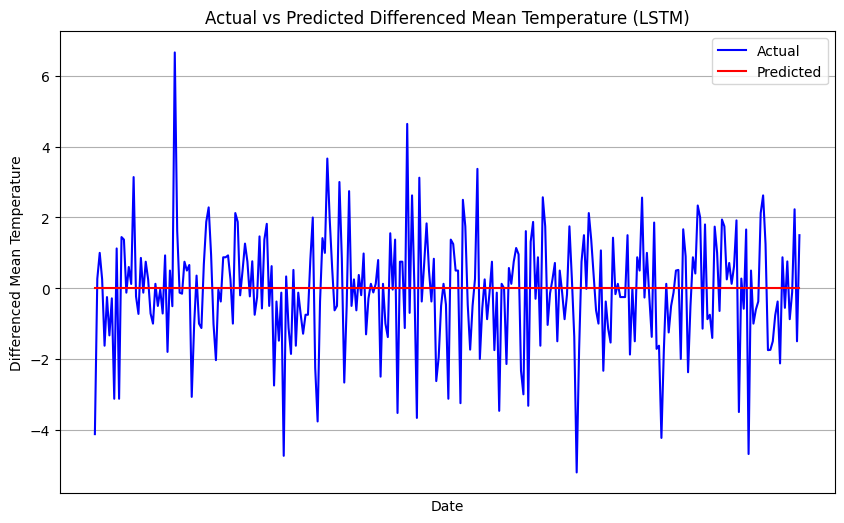

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df_temperature.index[-len(y_test):], y_test, color='blue', label='Actual')
plt.plot(df_temperature.index[-len(y_pred):], y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Differenced Mean Temperature (LSTM)')
plt.xlabel('Date')
plt.ylabel('Differenced Mean Temperature')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**********************************************************

**********************************************************

**********************************************************